In [1]:
import nltk
nltk.download('punkt', download_dir='.')
nltk.download('stopwords', download_dir='.')
nltk.download('stopwords')
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
import keras

import pandas as pd
import numpy as np

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\phani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import tensorflow as tf

In [3]:
!pip install livelossplot

In [4]:
from livelossplot.tf_keras import PlotLossesCallback

In [5]:
df = pd.read_csv('D:/ML/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.shape

(74681, 4)

In [7]:
df.drop(df[df.iloc[:, -1].isnull()].index, inplace=True)

In [8]:
df.shape

(73995, 4)

In [9]:
def tokenize_text(text):
    tokenized_str = nltk.word_tokenize(text)
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [i.lower() for i in tokenized_str if i not in string.punctuation]
    tokens = [i.lower() for i in tokens if i not in stop_words]
    return tokens

In [10]:
tokensed_tweets = df.iloc[:, -1].apply(tokenize_text)
tokensed_tweets[:5]

0                  [coming, borders, kill]
1         [im, getting, borderlands, kill]
2        [im, coming, borderlands, murder]
3    [im, getting, borderlands, 2, murder]
4       [im, getting, borderlands, murder]
Name: im getting on borderlands and i will murder you all ,, dtype: object

In [11]:
df['tokensed_tweets'] = tokensed_tweets

In [12]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"


In [13]:
from gensim.models import Word2Vec
w2v = Word2Vec(df['tokensed_tweets'], vector_size=256, window=10, min_count=10, workers=4, sg=1)

In [14]:
w2v.wv.get_vector('android')

array([ 1.92686126e-01, -1.13128103e-01,  2.50321627e-02, -3.50132622e-02,
       -1.49561718e-01,  3.51369917e-01, -1.10053137e-01, -1.43239453e-01,
       -1.57028448e-03,  1.49392277e-01, -1.63679272e-01,  2.46655151e-01,
        3.08320485e-02, -4.23193276e-01, -7.24763870e-02,  6.90223694e-01,
       -2.19419867e-01, -3.53814662e-01,  2.77721256e-01,  3.50441366e-01,
       -3.33556235e-02, -1.06071092e-01, -6.93175122e-02, -6.85407877e-01,
        6.21076785e-02, -2.49896594e-03,  2.90004820e-01,  8.97131711e-02,
       -3.40937003e-02,  3.94263901e-02,  4.91477519e-01,  1.46503970e-01,
        1.13713592e-01, -5.77666879e-01, -2.34692782e-01, -5.17407730e-02,
       -7.09578246e-02, -3.40498447e-01, -5.75664580e-01, -2.92421579e-01,
        3.39463085e-01,  2.35605970e-01, -6.96405172e-02,  1.50317818e-01,
       -1.50522634e-01, -2.11667921e-03, -3.92681267e-03, -1.36331081e-01,
        3.18159044e-01,  1.11984164e-01,  1.38324514e-01, -6.20211649e-04,
       -1.81305893e-02, -

In [15]:
w2v.wv.most_similar('android')

[('ios', 0.7408823370933533),
 ('itt', 0.6689788699150085),
 ('api', 0.6428942084312439),
 ('processor', 0.6267159581184387),
 ('failure', 0.6218145489692688),
 ('keyboard', 0.6144088506698608),
 ('pso2', 0.6135131120681763),
 ('universal', 0.613447904586792),
 ('kin', 0.6115372180938721),
 ('lite', 0.606548547744751)]

In [16]:
word_vocab = w2v.wv.key_to_index
len(word_vocab.keys())

7884

In [17]:
df.Positive.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Positive'] = encoder.fit_transform(df['Positive'])
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",tokensed_tweets
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,"[coming, borders, kill]"
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,"[im, getting, borderlands, kill]"
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,"[im, coming, borderlands, murder]"
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,"[im, getting, borderlands, 2, murder]"
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,"[im, getting, borderlands, murder]"


In [19]:
df.Positive.unique()

array([3, 2, 1, 0])

In [20]:
word_vocab = {k:(v+3) for k,v in word_vocab.items()}
word_vocab["<PAD>"] = 0
word_vocab["<START>"] = 1
word_vocab["<UNKNOWN>"] = 2

reverse_word_vocab = dict([(value, key) for (key, value) in word_vocab.items()])

# index sequence to text
def decode_review(text):
    return ' '.join([reverse_word_vocab.get(i, '?') for i in text])

# text to index sequence
def encode_review(text):
    text = ['<START>'] + text
    idxs = np.array([word_vocab.get(word, word_vocab['<UNKNOWN>']) for word in text])
    return idxs

In [21]:
df['vect'] = df.tokensed_tweets.apply(encode_review)

print(df.tokensed_tweets[1])
print(df.vect[1])
print('Example of a decoded review: \n{}'.format(decode_review(df.vect[1])))

['im', 'getting', 'borderlands', 'kill']
[  1 206  94  69 320]
Example of a decoded review: 
<START> im getting borderlands kill


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.vect, df.Positive, test_size=0.2, random_state=40)

In [23]:
X_train[:5]

9952     [1, 217, 187, 55, 267, 1957, 4823, 1069, 63, 3...
5667     [1, 110, 298, 551, 945, 42, 247, 429, 722, 309...
38790                               [1, 39, 2, 1154, 1233]
32604    [1, 34, 380, 95, 197, 86, 345, 1564, 146, 4, 4...
29729    [1, 214, 2, 1665, 56, 103, 978, 2062, 3, 93, 6...
Name: vect, dtype: object

In [24]:
y_train[:5]

9952     2
5667     2
38790    1
32604    2
29729    1
Name: Positive, dtype: int32

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1))

In [26]:
y_train[:5]

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [27]:
from random import randint

MAX_SEQ_LEN = 128 # Final sequence length

train_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_train,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

valid_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_test,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

print("Length examples: {}".format([len(train_data[randint(1, 100)]), len(train_data[1])]))
print('=====================================')
print("Entry example: {}".format(train_data[randint(1, 100)]))

Length examples: [128, 128]
Entry example: [   1   39    2 1154 1233    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [28]:
BATCH_SIZE = 256

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(26960, 64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)
        ),
    tf.keras.layers.Dense(4, activation='softmax'),
])
model_lstm.summary()

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[tf.keras.metrics.AUC()])
# keras.utils.plot_model(model_lstm)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          1725440   
                                                                 
 bidirectional (Bidirection  (None, None, 64)          24832     
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, None, 64)          256       
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          24832     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, None, 64)          256       
 chNormalization)                                       

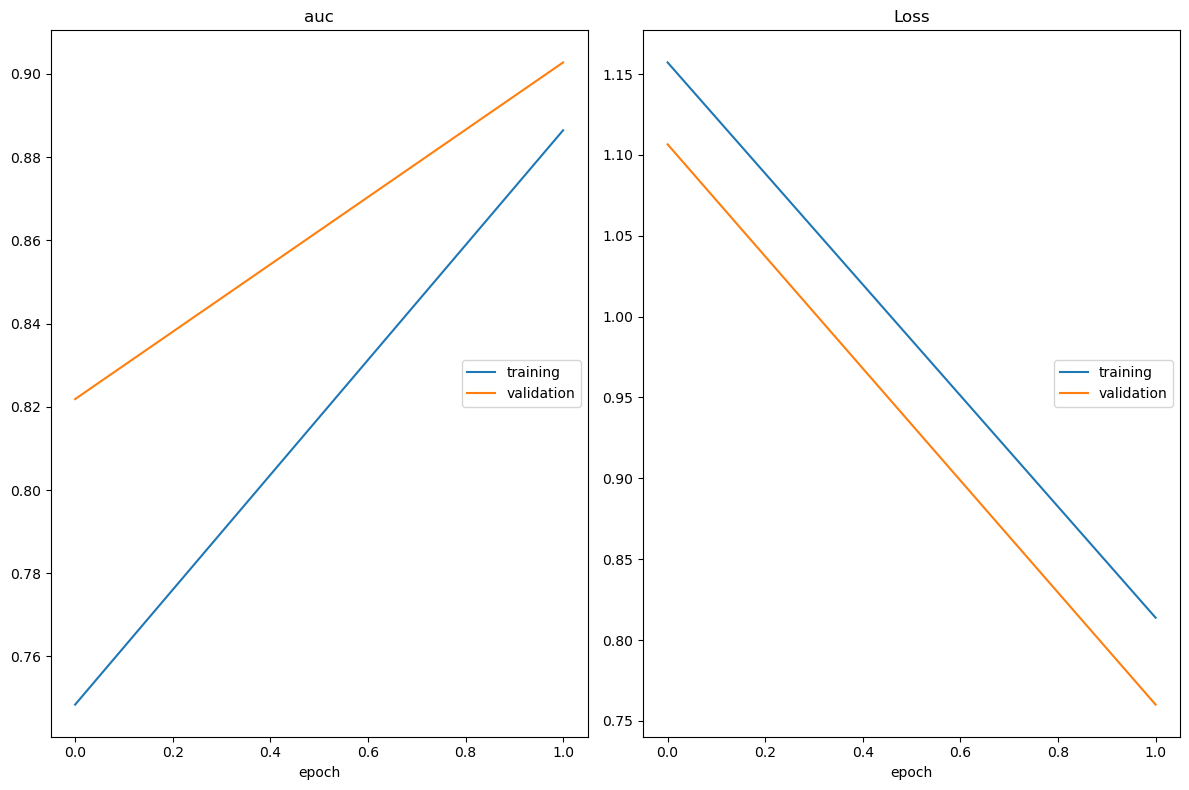

auc
	training         	 (min:    0.748, max:    0.886, cur:    0.886)
	validation       	 (min:    0.822, max:    0.903, cur:    0.903)
Loss
	training         	 (min:    0.814, max:    1.157, cur:    0.814)
	validation       	 (min:    0.760, max:    1.107, cur:    0.760)
232/232 [==============================] - 1771s 8s/step - loss: 0.8138 - auc: 0.8864 - val_loss: 0.7601 - val_auc: 0.9027


In [29]:
EPOCHS = 2
history = model_lstm.fit(
    train_data, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(valid_data, y_test),
    epochs=EPOCHS,
    callbacks=[PlotLossesCallback()])

In [32]:
model_lstm.predict(valid_data[0, None])

1/1 [==============================] - 0s 157ms/step


array([[0.03775556, 0.41430688, 0.27735   , 0.2705876 ]], dtype=float32)

In [31]:
results = model_lstm.evaluate(valid_data, y_test)

print('Test loss: {:.4f}'.format(results[0]))
print('Test accuracy: {:.2f} %'.format(results[1]*100))

463/463 [==============================] - 30s 64ms/step - loss: 0.7601 - auc: 0.9027
Test loss: 0.7601
Test accuracy: 90.27 %
